# Requirements

In [1]:
# Add as many imports as you need
import pandas as pd
from pandas.core.interchange.dataframe_protocol import DataFrame
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [2]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('spotify_songs.csv')
data.sample(5)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
7025,0.856,0.472,-9.452,0.0641,0.140000,0.000000,0.1230,0.642,NaN,rap
6155,NaN,0.670,-5.484,0.0480,0.254000,0.000054,0.0829,0.227,122.999,rap
31329,0.600,NaN,NaN,0.0426,0.109000,0.000000,0.0995,0.459,127.926,edm
8402,0.611,0.723,NaN,0.2640,0.008540,NaN,0.5570,0.493,160.094,rap
1880,0.562,0.964,-2.991,0.0720,0.000539,0.000002,0.5790,0.410,138.063,pop


In [3]:
data.isnull().sum() / len(data) * 100


danceability        11.153413
energy              34.297810
loudness            23.208357
speechiness          7.190936
acousticness         2.722870
instrumentalness    19.705784
liveness             9.094509
valence             22.809369
tempo               19.970761
genre                0.000000
dtype: float64

In [4]:
def knn_imputer(data, columns):
    imputer = KNNImputer(n_neighbors=5)
    data_copy = data.copy()
    for column in columns:
        data_copy[column] = imputer.fit_transform(data_copy[[column]])
    return data_copy

In [5]:
data_imputed = knn_imputer(data,
                           ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                            'valence', 'liveness', 'tempo'])

In [6]:
data_imputed.isnull().sum() / len(data_imputed) * 100

danceability        0.0
energy              0.0
loudness            0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
genre               0.0
dtype: float64

In [7]:
data_imputed['genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

Preprocess the input and the output variables appropriately.

In [8]:
# Write your code here. Add as many boxes as you need.
label_encoder = LabelEncoder()
data_imputed['genre'] = label_encoder.fit_transform(data_imputed['genre'])
data_imputed.sample(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
10308,0.636000,0.697964,-6.700534,0.0500,0.043900,0.0101,0.093500,0.119,121.057,4
12179,0.655237,0.779000,-6.700534,0.0266,0.175157,0.0552,0.190442,0.669,105.086,5


Explore the dataset using visualizations of your choice.

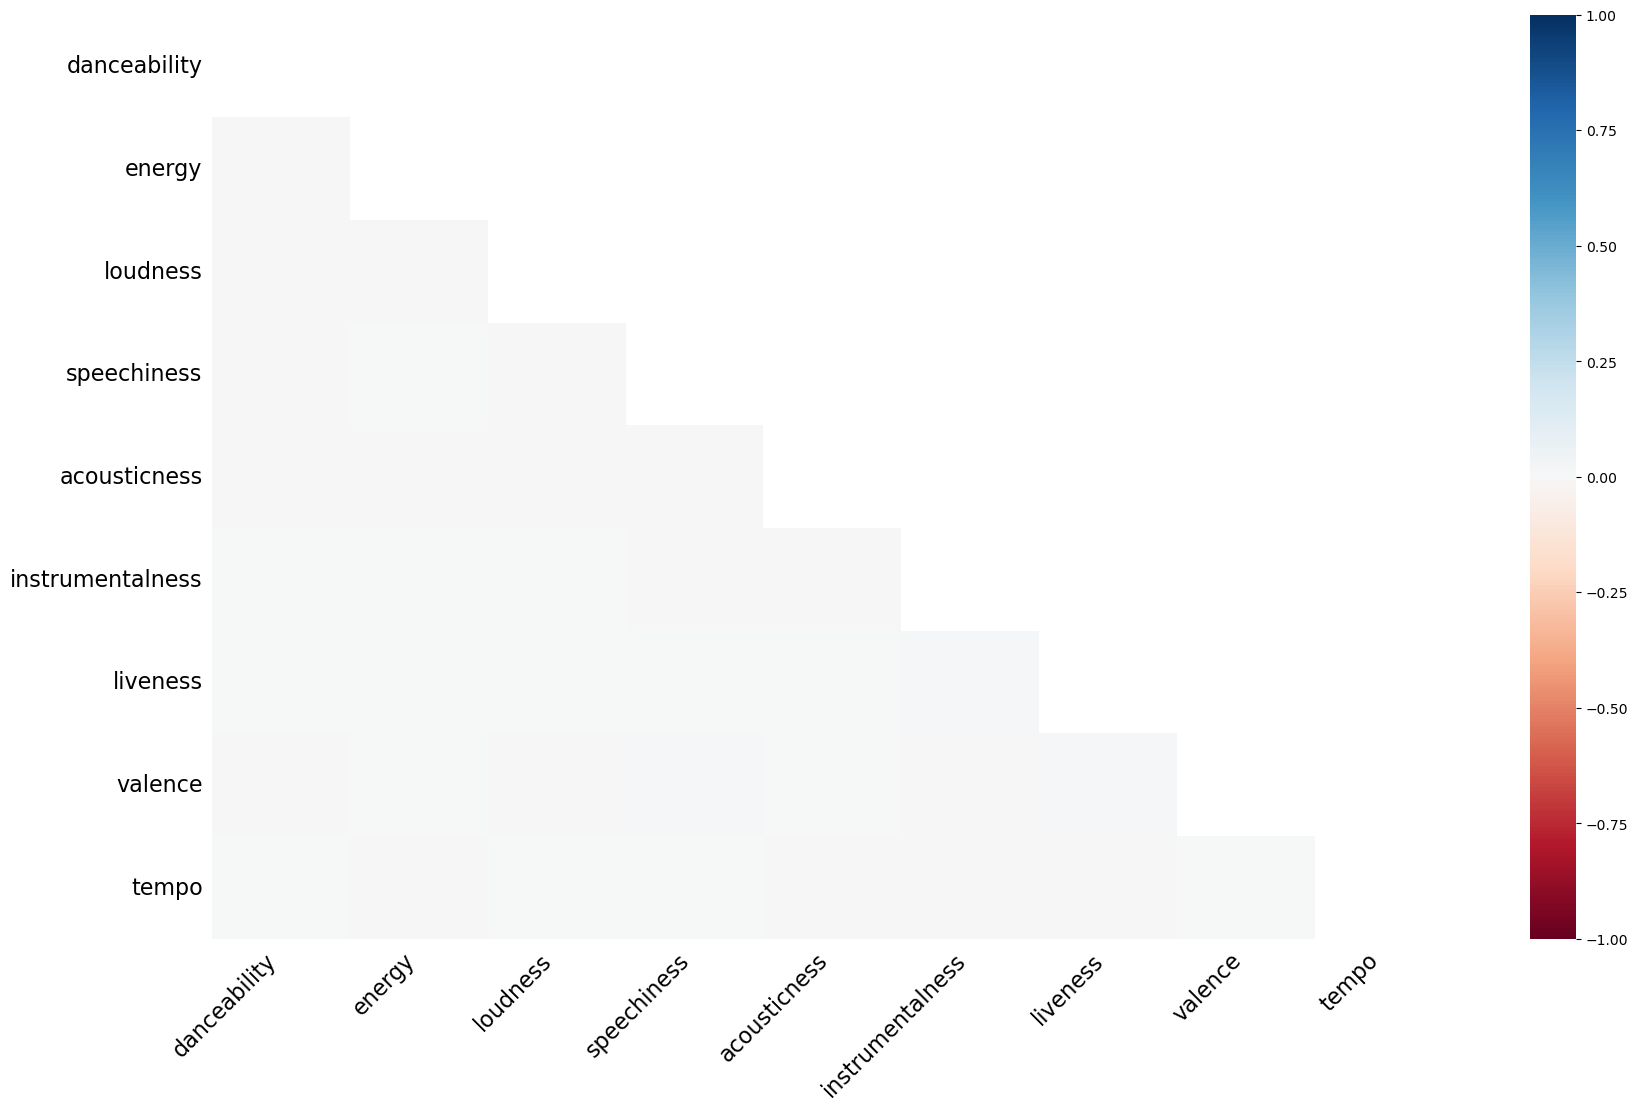

In [9]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)
plt.show()

Check if the dataset is balanced.

In [ ]:
# Write your code here. Add as many boxes as you need.


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [20]:
# Write your code here. Add as many boxes as you need.
X = data_imputed.drop('genre', axis=1)
Y = data_imputed['genre']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [21]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [32]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, Y_train)
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_pred, Y_test)
print(accuracy)
print(classification_report(y_pred, Y_test))


0.48484848484848486
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1234
           1       0.39      0.43      0.41       897
           2       0.28      0.29      0.29      1058
           3       0.36      0.42      0.39       966
           4       0.58      0.52      0.55      1302
           5       0.66      0.59      0.62      1110

    accuracy                           0.48      6567
   macro avg       0.48      0.48      0.48      6567
weighted avg       0.50      0.48      0.49      6567



Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different classification metrics.

In [ ]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [36]:
# Write your code here. Add as many boxes as you need
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)


## Feature Scaling
Standardize the features appropriately.

In [37]:
# Write your code here. Add as many boxes as you need.
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [39]:
# Write your code here. Add as many boxes as you need.
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, Y_train)
param_grid = {
    'n-estimators': [100,200],
    'max_depth': [3, 5,10],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5,verbose=2,n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print(accuracy_score(y_pred, Y_test))

C:\Users\dsand\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:17:40] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\dsand\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:10] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "n-estimators", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.5048721071863581


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.